# **라이브러리 불러오기**

In [634]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [635]:
train=pd.read_csv('../Data/train.csv')
test=pd.read_csv('../Data/test.csv')
submission=pd.read_csv('../Data/sample_submission.csv')

In [636]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

# **[데이터 살펴보기 & 전처리]**

# Feature 설명

index   
gender: 성별  (0)
car: 차량 소유 여부  (0)
reality: 부동산 소유 여부  (0)
child_num: 자녀 수   (0)
income_total: 연간 소득  (o)
income_type: 소득 분류   
['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student']   (0)
edu_type: 교육 수준   
['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']    (0)
family_type: 결혼 여부   
['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']    (0)
house_type: 생활 방식   
['Municipal apartment', 'House / apartment', 'With parents','Co-op apartment', 'Rented apartment', 'Office apartment']    (0)
DAYS_BIRTH: 출생일   (0)
데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미   
DAYS_EMPLOYED: 업무 시작일   (0)   
데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미,양수 값은 고용되지 않은 상태를 의미함   
FLAG_MOBIL: 핸드폰 소유 여부  (0) -> 제거
work_phone: 업무용 전화 소유 여부   (0)
phone: 전화 소유 여부  (0) 
email: 이메일 소유 여부   (0)
occyp_type: 직업 유형	  (0) 												
family_size: 가족 규모  (0) 
begin_month: 신용카드 발급 월 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미

credit: 사용자의 신용카드 대금 연체를 기준으로 한 신용도   
=> 낮을 수록 높은 신용의 신용카드 사용자를 의미함   

## int -> categorical

### family_size

In [653]:
train['family_size'].value_counts()

2.0     14106
1.0      5109
3.0      4632
4.0      2260
5.0       291
6.0        44
7.0         9
15.0        3
9.0         2
20.0        1
Name: family_size, dtype: int64

In [654]:
train.loc[train['family_size']>=5, 'family_size'] = 5
test.loc[test['family_size']>=5, 'family_size'] = 5

In [655]:
train['family_size'].value_counts()
test['family_size'].value_counts()

2.0    5357
1.0    1878
3.0    1789
4.0     846
5.0     130
Name: family_size, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x189d71daa00>,
 'caps': [<matplotlib.lines.Line2D at 0x189d71e6100>,
 'boxes': [<matplotlib.lines.Line2D at 0x189d71da6a0>],
 'medians': [<matplotlib.lines.Line2D at 0x189d71e67c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x189d71e6b20>],
 'means': []}

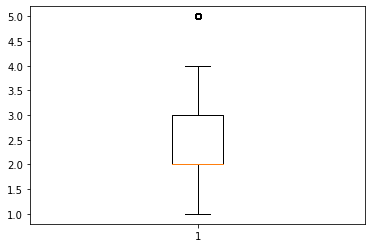

In [656]:
plt.boxplot(train['family_size'])

In [657]:
Q1 = train['family_size'].quantile(.25)
Q3 = train['family_size'].quantile(.75)
IQR = Q3 - Q1
Q2 = train['family_size'].quantile(.5)
Q4 = train['family_size'].quantile(1)


train.loc[train['family_size'] <= Q1,'child_num'] = 1
train.loc[(train['family_size'] > Q1) & (train['family_size'] <= Q2),'child_num'] = 2
train.loc[(train['family_size'] > Q2) & (train['family_size'] <= Q3),'child_num'] = 3
train.loc[(train['family_size'] > Q3) & (train['family_size'] <= Q4),'child_num'] = 4
train.loc[train['family_size'] != Q4, 'child_num'] = 5

train['family_size'] = train['family_size'].replace([1,2,3,4,5],['A','B','C','D','E'])

train['family_size'].value_counts()

B    14106
A     5109
C     4632
D     2260
E      350
Name: family_size, dtype: int64

In [658]:
Q1 = test['family_size'].quantile(.25)
Q3 = test['family_size'].quantile(.75)
IQR = Q3 - Q1
Q2 = test['family_size'].quantile(.5)
Q4 = test['family_size'].quantile(1)


test.loc[test['family_size'] <= Q1,'child_num'] = 1
test.loc[(test['family_size'] > Q1) & (test['family_size'] <= Q2),'child_num'] = 2
test.loc[(test['family_size'] > Q2) & (test['family_size'] <= Q3),'child_num'] = 3
test.loc[(test['family_size'] > Q3) & (test['family_size'] <= Q4),'child_num'] = 4
test.loc[test['family_size'] != Q4, 'child_num'] = 5

test['family_size'] = test['family_size'].replace([1,2,3,4,5],['A','B','C','D','E'])

test['family_size'].value_counts()

B    5357
A    1878
C    1789
D     846
E     130
Name: family_size, dtype: int64

### begin_month

<AxesSubplot:ylabel='Frequency'>

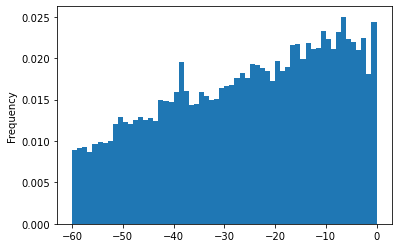

In [659]:
train['begin_month'].value_counts()
train['begin_month'].plot(kind='hist',bins=60,density=True)

<AxesSubplot:ylabel='Frequency'>

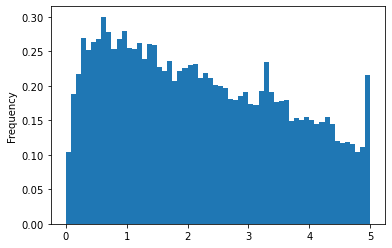

In [660]:
train['begin_month'] = abs(train['begin_month']/12) # 년단위로 묶음
test['begin_month'] = abs(test['begin_month']/12)

train['begin_month'].plot(kind='hist',bins=60,density=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x189d749bc70>,
 'caps': [<matplotlib.lines.Line2D at 0x189d74a7370>,
 'boxes': [<matplotlib.lines.Line2D at 0x189d749b910>],
 'medians': [<matplotlib.lines.Line2D at 0x189d74a7a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x189d74a7d90>],
 'means': []}

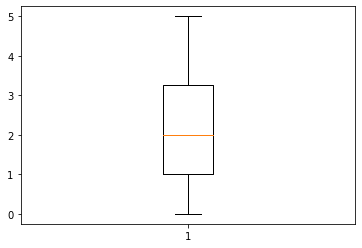

In [661]:
plt.boxplot(train['begin_month'])

In [662]:
# 년단위로 범주화 
for dataset in train_and_test :
    Q1 = train['begin_month'].quantile(.25)
    Q3 = train['begin_month'].quantile(.75)
    IQR = Q3 - Q1
    Q2 = train['begin_month'].quantile(.5)
    Q4 = train['begin_month'].quantile(1)
    #print(Q1, Q2, Q3, Q4)

train.loc[train['begin_month'] <= Q1,'begin_month'] = 1
train.loc[(train['begin_month'] > Q1) & (train['begin_month'] <= Q2),'begin_month'] = 2
train.loc[(train['begin_month'] > Q2) & (train['begin_month'] <= Q3),'begin_month'] = 3
train.loc[(train['begin_month'] > Q3) & (train['begin_month'] <= Q4),'begin_month'] = 4

train['begin_month'] = train['begin_month'].replace([1,2,3,4],['A','B','C','D'])

train['begin_month'].value_counts()

A    7049
C    6572
D    6566
B    6270
Name: begin_month, dtype: int64

In [663]:
for dataset in train_and_test :
    Q1 = test['begin_month'].quantile(.25)
    Q3 = test['begin_month'].quantile(.75)
    IQR = Q3 - Q1
    Q2 = test['begin_month'].quantile(.5)
    Q4 = test['begin_month'].quantile(1)
    #print(Q1, Q2, Q3, Q4)

test.loc[test['begin_month'] <= Q1,'begin_month'] = 1
test.loc[(test['begin_month'] > Q1) & (test['begin_month'] <= Q2),'begin_month'] = 2
test.loc[(test['begin_month'] > Q2) & (test['begin_month'] <= Q3),'begin_month'] = 3
test.loc[(test['begin_month'] > Q3) & (test['begin_month'] <= Q4),'begin_month'] = 4

test['begin_month'] = test['begin_month'].replace([1,2,3,4],['A','B','C','D'])

test['begin_month'].value_counts()

B    2633
A    2541
D    2458
C    2368
Name: begin_month, dtype: int64

In [509]:
''' for i in range(0, 5, 1):
    start = i 
    end = i + 1
    temp = train[(train['begin_month'] >= start) & (train['begin_month'] < end)]
    print("{}년 이상 {}년 미만 : {}".format(start, end, temp['begin_month'].count()))'''

0년 이상 1년 미만 : 6488
1년 이상 2년 미만 : 6322
2년 이상 3년 미만 : 5377
3년 이상 4년 미만 : 4643
4년 이상 5년 미만 : 3392


### DAYS_EMPLOYED

In [669]:
train.loc[train['DAYS_EMPLOYED'] > 0, 'DAYS_EMPLOYED'] = 0
test.loc[test['DAYS_EMPLOYED'] > 0, 'DAYS_EMPLOYED'] = 0

In [670]:
train['DAYS_EMPLOYED'] = abs(train['DAYS_EMPLOYED'])
test['DAYS_EMPLOYED'] = abs(test['DAYS_EMPLOYED'])

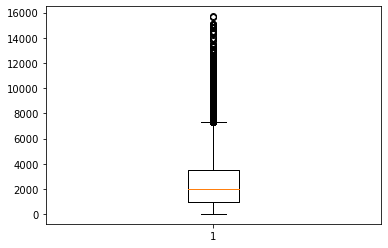

In [671]:
plt.boxplot(train.loc[train['DAYS_EMPLOYED'] > 0, 'DAYS_EMPLOYED'])
plt.show()

In [672]:
train['DAYS_EMPLOYED'].value_counts()

0       4438
401       57
1539      47
200       45
2087      44
        ... 
7864       1
1723       1
1755       1
5865       1
4305       1
Name: DAYS_EMPLOYED, Length: 3470, dtype: int64

In [673]:
Q1 = train.loc[train['DAYS_EMPLOYED'] > 0, 'DAYS_EMPLOYED'].quantile(0.25)
Q2 = train.loc[train['DAYS_EMPLOYED'] > 0, 'DAYS_EMPLOYED'].quantile(0.5)
Q3 = train.loc[train['DAYS_EMPLOYED'] > 0, 'DAYS_EMPLOYED'].quantile(0.75)
Q4 = train.loc[train['DAYS_EMPLOYED'] > 0, 'DAYS_EMPLOYED'].quantile(1.0)
IQR = Q3 - Q1

train.loc[train['DAYS_EMPLOYED'] == 0 ,'DAYS_EMPLOYED'] = 0
train.loc[(train['DAYS_EMPLOYED'] != 0) & (train['DAYS_EMPLOYED'] <= Q1),'DAYS_EMPLOYED'] = 1
train.loc[(train['DAYS_EMPLOYED'] > Q1) & (train['DAYS_EMPLOYED'] <= Q2),'DAYS_EMPLOYED'] = 2
train.loc[(train['DAYS_EMPLOYED'] > Q2) & (train['DAYS_EMPLOYED'] <= Q3),'DAYS_EMPLOYED'] = 3
train.loc[(train['DAYS_EMPLOYED'] > Q3) & (train['DAYS_EMPLOYED'] <= Q4),'DAYS_EMPLOYED'] = 4

train['DAYS_EMPLOYED'] = train['DAYS_EMPLOYED'].replace([0,1,2,3,4],['A','B','C','D','E'])
train['DAYS_EMPLOYED'].value_counts()

D    5511
C    5506
B    5505
E    5497
A    4438
Name: DAYS_EMPLOYED, dtype: int64

In [674]:
Q1 = test.loc[test['DAYS_EMPLOYED'] > 0, 'DAYS_EMPLOYED'].quantile(0.25)
Q2 = test.loc[test['DAYS_EMPLOYED'] > 0, 'DAYS_EMPLOYED'].quantile(0.5)
Q3 = test.loc[test['DAYS_EMPLOYED'] > 0, 'DAYS_EMPLOYED'].quantile(0.75)
Q4 = test.loc[test['DAYS_EMPLOYED'] > 0, 'DAYS_EMPLOYED'].quantile(1.0)
IQR = Q3 - Q1

test.loc[test['DAYS_EMPLOYED'] == 0 ,'DAYS_EMPLOYED'] = 0
test.loc[(test['DAYS_EMPLOYED'] != 0) & (test['DAYS_EMPLOYED'] <= Q1),'DAYS_EMPLOYED'] = 1
test.loc[(test['DAYS_EMPLOYED'] > Q1) & (test['DAYS_EMPLOYED'] <= Q2),'DAYS_EMPLOYED'] = 2
test.loc[(test['DAYS_EMPLOYED'] > Q2) & (test['DAYS_EMPLOYED'] <= Q3),'DAYS_EMPLOYED'] = 3
test.loc[(test['DAYS_EMPLOYED'] > Q3) & (test['DAYS_EMPLOYED'] <= Q4),'DAYS_EMPLOYED'] = 4

test['DAYS_EMPLOYED'] = test['DAYS_EMPLOYED'].replace([0,1,2,3,4],['A','B','C','D','E'])
test['DAYS_EMPLOYED'].value_counts()

B    2080
D    2076
E    2075
C    2072
A    1697
Name: DAYS_EMPLOYED, dtype: int64

### DAYS_BIRTH

<AxesSubplot:ylabel='Frequency'>

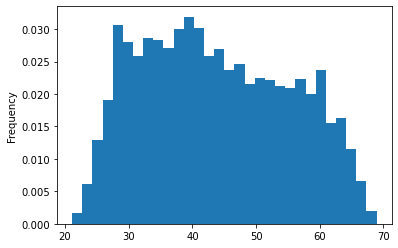

In [665]:
train['DAYS_BIRTH'] = (-train['DAYS_BIRTH']/365)
test['DAYS_BIRTH'] = (-test['DAYS_BIRTH']/365)

train['DAYS_BIRTH'].plot(kind='hist',bins=30,density=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x189d7597520>,
 'caps': [<matplotlib.lines.Line2D at 0x189d7597be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x189d7597190>],
 'medians': [<matplotlib.lines.Line2D at 0x189d75a12e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x189d75a1640>],
 'means': []}

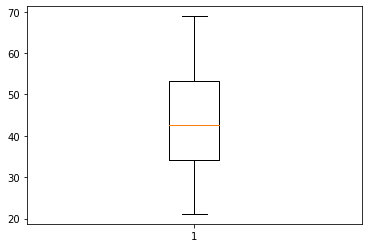

In [666]:
plt.boxplot(train['DAYS_BIRTH'])

In [667]:
for dataset in train_and_test :
    Q1 = train['DAYS_BIRTH'].quantile(.25)
    Q3 = train['DAYS_BIRTH'].quantile(.75)
    IQR = Q3 - Q1
    Q2 = train['DAYS_BIRTH'].quantile(.5)
    Q4 = train['DAYS_BIRTH'].quantile(1)
    #print(Q1 , Q2, Q3, Q4)

train.loc[train['DAYS_BIRTH'] <= Q1,'DAYS_BIRTH'] = 1
train.loc[(train['DAYS_BIRTH'] > Q1) & (train['DAYS_BIRTH'] <= Q2),'DAYS_BIRTH'] = 2
train.loc[(train['DAYS_BIRTH'] > Q2) & (train['DAYS_BIRTH'] <= Q3),'DAYS_BIRTH'] = 3
train.loc[(train['DAYS_BIRTH'] > Q3) & (train['DAYS_BIRTH'] <= Q4),'DAYS_BIRTH'] = 4

train['DAYS_BIRTH'] = train['DAYS_BIRTH'].replace([1,2,3,4],['A','B','C','D'])

train['DAYS_BIRTH'].value_counts()

C    6626
A    6616
B    6613
D    6602
Name: DAYS_BIRTH, dtype: int64

In [668]:
for dataset in train_and_test :
    Q1 = test['DAYS_BIRTH'].quantile(.25)
    Q3 = test['DAYS_BIRTH'].quantile(.75)
    IQR = Q3 - Q1
    Q2 = test['DAYS_BIRTH'].quantile(.5)
    Q4 = test['DAYS_BIRTH'].quantile(1)
    #print(Q1 , Q2, Q3, Q4)

test.loc[test['DAYS_BIRTH'] <= Q1,'DAYS_BIRTH'] = 1
test.loc[(test['DAYS_BIRTH'] > Q1) & (test['DAYS_BIRTH'] <= Q2),'DAYS_BIRTH'] = 2
test.loc[(test['DAYS_BIRTH'] > Q2) & (test['DAYS_BIRTH'] <= Q3),'DAYS_BIRTH'] = 3
test.loc[(test['DAYS_BIRTH'] > Q3) & (test['DAYS_BIRTH'] <= Q4),'DAYS_BIRTH'] = 4

test['DAYS_BIRTH'] = test['DAYS_BIRTH'].replace([1,2,3,4],['A','B','C','D'])

test['DAYS_BIRTH'].value_counts()

A    2501
B    2500
D    2500
C    2499
Name: DAYS_BIRTH, dtype: int64

### child_num

In [637]:
train['child_num'].value_counts()

0     18340
1      5386
2      2362
3       306
4        47
5        10
14        3
7         2
19        1
Name: child_num, dtype: int64

In [638]:
test['child_num'].value_counts()

0    6861
1    2106
2     894
3     113
4      16
5      10
Name: child_num, dtype: int64

In [639]:
train.loc[train['child_num']>=3,'child_num'] = 3
test.loc[test['child_num']>=3, 'child_num'] = 3

{'whiskers': [<matplotlib.lines.Line2D at 0x189d733dac0>,
 'caps': [<matplotlib.lines.Line2D at 0x189d73471c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x189d733d730>],
 'medians': [<matplotlib.lines.Line2D at 0x189d7347880>],
 'fliers': [<matplotlib.lines.Line2D at 0x189d7347be0>],
 'means': []}

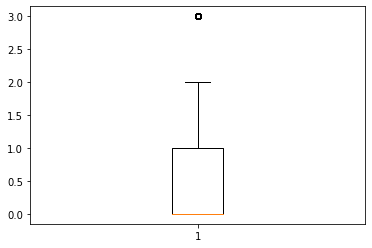

In [640]:
plt.boxplot(train['child_num'])

In [641]:
Q1 = train['child_num'].quantile(.25)
Q3 = train['child_num'].quantile(.75)
IQR = Q3 - Q1
Q2 = train['child_num'].quantile(.5)
Q4 = train['child_num'].quantile(1)
# print(Q1 , Q2, Q3, Q4)

train.loc[train['child_num'] <= Q1,'child_num'] = 1
train.loc[(train['child_num'] > Q1) & (train['child_num'] <= Q2),'child_num'] = 2
train.loc[(train['child_num'] > Q2) & (train['child_num'] <= Q3),'child_num'] = 3
train.loc[(train['child_num'] > Q3) & (train['child_num'] <= Q4),'child_num'] = 4


train['child_num'] = train['child_num'].replace([1,2,3,4],['A','B','C','D'])

train['child_num'].value_counts()

D    26457
Name: child_num, dtype: int64

In [599]:
Q1 = test['child_num'].quantile(.25)
Q3 = test['child_num'].quantile(.75)
IQR = Q3 - Q1
Q2 = test['child_num'].quantile(.5)
Q4 = test['child_num'].quantile(1)
# print(Q1 , Q2, Q3, Q4)

test.loc[test['child_num'] <= Q1,'child_num'] = 1
test.loc[(test['child_num'] > Q1) & (test['child_num'] <= Q2),'child_num'] = 2
test.loc[(test['child_num'] > Q2) & (test['child_num'] <= Q3),'child_num'] = 3
test.loc[(test['child_num'] > Q3) & (test['child_num'] <= Q4),'child_num'] = 4


test['child_num'] = test['child_num'].replace([1,2,3,4],['A','B','C','D'])

test['child_num'].value_counts()

D    10000
Name: child_num, dtype: int64

### income_total

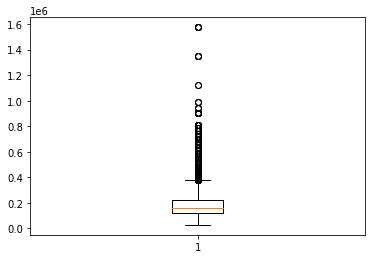

In [642]:
plt.boxplot(train['income_total'])

plt.show()

범주형으로 묶기

In [643]:
for dataset in train_and_test :
    Q1 = train['income_total'].quantile(.25)
    Q3 = train['income_total'].quantile(.75)
    IQR = Q3 - Q1
    Q2 = train['income_total'].quantile(.5)
    Q4 = train['income_total'].quantile(1)
    # print(Q1 , Q2, Q3, Q4)


train.loc[train['income_total'] <= Q1,'income_total'] = 1
train.loc[(train['income_total'] > Q1) & (train['income_total'] <= Q2),'income_total'] = 2
train.loc[(train['income_total'] > Q2) & (train['income_total'] <= Q3),'income_total'] = 3
train.loc[(train['income_total'] > Q3) & (train['income_total'] <= Q4),'income_total'] = 4


train['income_total'] = train['income_total'].replace([1,2,3,4],['A','B','C','D'])

train['income_total'].value_counts()

C    7334
A    6751
B    6685
D    5687
Name: income_total, dtype: int64

In [644]:
for dataset in train_and_test :
    Q1 = test['income_total'].quantile(.25)
    Q3 = test['income_total'].quantile(.75)
    IQR = Q3 - Q1
    Q2 = test['income_total'].quantile(.5)
    Q4 = test['income_total'].quantile(1)
    # print(Q1 , Q2, Q3, Q4)


test.loc[test['income_total'] <= Q1,'income_total'] = 1
test.loc[(test['income_total'] > Q1) & (test['income_total'] <= Q2),'income_total'] = 2
test.loc[(test['income_total'] > Q2) & (test['income_total'] <= Q3),'income_total'] = 3
test.loc[(test['income_total'] > Q3) & (test['income_total'] <= Q4),'income_total'] = 4


test['income_total'] = test['income_total'].replace([1,2,3,4],['A','B','C','D'])

test['income_total'].value_counts()

C    2791
A    2642
B    2485
D    2082
Name: income_total, dtype: int64

### FLAG_MOBIL, work_phone, phone

In [645]:
# train['FLAG_MOBIL'].value_counts() -> drop
train=train.drop('occyp_type', axis=1)
test=test.drop('occyp_type', axis=1)

In [646]:
train['work_phone'].value_counts()
test['work_phone'].value_counts()

0    7724
1    2276
Name: work_phone, dtype: int64

In [647]:
train['work_phone'] = train['work_phone'].replace([0,1],['Y','N'])
test['work_phone'] = test['work_phone'].replace([0,1],['Y','N'])

In [648]:
train['phone'].value_counts()
test['phone'].value_counts()

0    7037
1    2963
Name: phone, dtype: int64

In [649]:
train['phone'] = train['phone'].replace([0,1],['Y','N'])
test['phone'] = test['phone'].replace([0,1],['Y','N'])

### email 

In [650]:
train['email'].value_counts()

0    24042
1     2415
Name: email, dtype: int64

In [651]:
train['email'] = train['email'].replace([0,1],['Y','N'])
test['email'] = test['email'].replace([0,1],['Y','N'])


### 확인

In [588]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
0,0,F,N,N,0,C,Commercial associate,Higher education,Married,Municipal apartment,B,E,1,Y,Y,Y,2.0,A,1.0
1,1,F,N,Y,1,D,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,A,C,1,Y,Y,N,3.0,A,1.0
2,2,M,Y,Y,0,D,Working,Higher education,Married,House / apartment,C,E,1,Y,N,Y,2.0,B,2.0
3,3,F,N,Y,0,C,Commercial associate,Secondary / secondary special,Married,House / apartment,B,D,1,Y,N,Y,2.0,C,0.0
4,4,F,Y,Y,0,B,State servant,Higher education,Married,House / apartment,B,D,1,Y,Y,Y,2.0,C,2.0


In [589]:
test.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month
0,26457,M,Y,N,0,A,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,D,A,1,Y,N,Y,2.0,D
1,26458,F,N,Y,0,B,State servant,Higher education,Married,House / apartment,C,E,1,Y,N,Y,2.0,C
2,26459,F,N,Y,0,A,Working,Secondary / secondary special,Married,House / apartment,C,B,1,N,N,Y,2.0,D
3,26460,M,Y,N,0,A,Commercial associate,Secondary / secondary special,Married,House / apartment,C,D,1,N,Y,Y,2.0,D
4,26461,F,Y,Y,0,C,State servant,Higher education,Married,House / apartment,C,E,1,N,Y,Y,2.0,A


In [590]:
train.shape

(26457, 19)

In [591]:
test.shape

(10000, 18)

In [675]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  object 
 5   income_total   26457 non-null  object 
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  object 
 11  DAYS_EMPLOYED  26457 non-null  object 
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  object 
 14  phone          26457 non-null  object 
 15  email          26457 non-null  object 
 16  family_size    26457 non-null  object 
 17  begin_month    26457 non-null  object 
 18  credit

# **[데이터 전처리]**

**(주의) train data에 해준 그대로 test data 전처리**

## **1. 결측치 제거** 

In [10]:
train.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

In [11]:
train=train.drop('occyp_type', axis=1)
test=test.drop('occyp_type', axis=1)

## **2. Binary variables**

In [12]:
train['gender'] = train['gender'].replace(['F','M'],[0,1])
test['gender'] = test['gender'].replace(['F','M'],[0,1])
print('gender :')
print(train['gender'].value_counts())
print('--------------')

print('Having a car or not : ')
train['car'] = train['car'].replace(['N','Y'],[0,1])
test['car'] = test['car'].replace(['N','Y'],[0,1])
print(train['car'].value_counts())
print('--------------')

print('Having house reality or not: ')
train['reality'] = train['reality'].replace(['N','Y'],[0,1])
test['reality'] = test['reality'].replace(['N','Y'],[0,1])
print(train['reality'].value_counts())
print('--------------')
      
print('Having a phone or not: ')
print(train['phone'].value_counts())
print('--------------')
      

print('Having a email or not: ')
print(train['email'].value_counts())
print('--------------')
      

print('Having a work phone or not: ')
print(train['work_phone'].value_counts())
print('--------------')

gender :
0    17697
1     8760
Name: gender, dtype: int64
--------------
Having a car or not : 
0    16410
1    10047
Name: car, dtype: int64
--------------
Having house reality or not: 
1    17830
0     8627
Name: reality, dtype: int64
--------------
Having a phone or not: 
0    18672
1     7785
Name: phone, dtype: int64
--------------
Having a email or not: 
0    24042
1     2415
Name: email, dtype: int64
--------------
Having a work phone or not: 
0    20511
1     5946
Name: work_phone, dtype: int64
--------------


## **3. Continuous variable**

### (1) child_num

<AxesSubplot:>

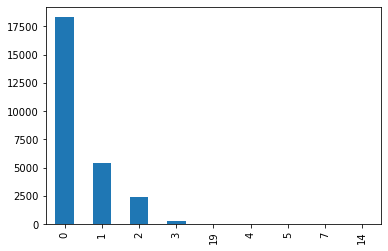

In [13]:
train['child_num'].value_counts(sort=False).plot.bar()

In [14]:
train.loc[train['child_num'] >= 2,'child_num']=2
test.loc[test['child_num']>=2, 'child_num']=2

### (2) inc

(2.544, 18.18]      16212
(18.18, 33.66]       8330
(33.66, 49.14]       1530
(49.14, 64.62]        206
(64.62, 80.1]         121
(80.1, 95.58]          44
(95.58, 111.06]         3
(111.06, 126.54]        2
(126.54, 142.02]        4
(142.02, 157.5]         5
Name: income_total, dtype: int64


<AxesSubplot:ylabel='Frequency'>

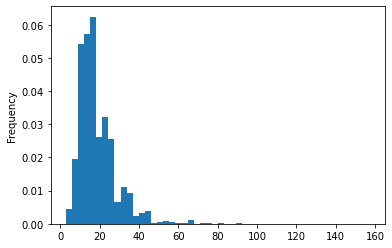

In [15]:
train['income_total'] = train['income_total'].astype(object)
train['income_total'] = train['income_total']/10000 
test['income_total'] = test['income_total']/10000
##############################################################3
print(train['income_total'].value_counts(bins=10,sort=False))
train['income_total'].plot(kind='hist',bins=50,density=True)

In [16]:
count, bin_dividers =np.histogram(train['income_total'], bins=7)
bin_names=['소득'+str(i) for i in range(7) ]
#bin_dividers는 train기준!!
train['income_total']=pd.cut(x=train['income_total'], bins=bin_dividers, labels=bin_names, include_lowest=True)
test['income_total']=pd.cut(x=test['income_total'], bins=bin_dividers, labels=bin_names, include_lowest=True)


In [17]:
test

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month
0,26457,1,1,0,0,소득0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,2.0,-60.0
1,26458,0,0,1,0,소득0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,2.0,-36.0
2,26459,0,0,1,0,소득0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,2.0,-40.0
3,26460,1,1,0,0,소득0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,2.0,-41.0
4,26461,0,1,1,0,소득0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,2.0,-8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,36452,0,1,1,0,소득0,Working,Incomplete higher,Married,House / apartment,-18593,-5434,1,1,1,0,2.0,-19.0
9996,36453,1,1,1,0,소득0,Working,Secondary / secondary special,Civil marriage,House / apartment,-10886,-1315,1,1,0,0,2.0,-34.0
9997,36454,0,0,1,0,소득1,Working,Secondary / secondary special,Married,House / apartment,-21016,-14018,1,0,0,0,2.0,-55.0
9998,36455,0,1,0,0,소득0,Commercial associate,Secondary / secondary special,Married,House / apartment,-16541,-1085,1,0,1,0,2.0,-33.0


### **(3) Type**

In [18]:
print(train['income_type'].unique())
print(train['edu_type'].unique())
print(train['family_type'].unique())
print(train['house_type'].unique())

['Commercial associate' 'Working' 'State servant' 'Pensioner' 'Student']
['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
['Married' 'Civil marriage' 'Separated' 'Single / not married' 'Widow']
['Municipal apartment' 'House / apartment' 'With parents'
 'Co-op apartment' 'Rented apartment' 'Office apartment']


In [19]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
train['income_type']=label_encoder.fit_transform(train['income_type'])
test['income_type']=label_encoder.transform(test['income_type'])
########################################################################
train['edu_type']=label_encoder.fit_transform(train['edu_type'])
test['edu_type']=label_encoder.transform(test['edu_type'])
########################################################################
train['family_type']=label_encoder.fit_transform(train['family_type'])
test['family_type']=label_encoder.transform(test['family_type'])
########################################################################
train['house_type']=label_encoder.fit_transform(train['house_type'])
test['house_type']=label_encoder.transform(test['house_type'])
########################################################################
train['income_total']=label_encoder.fit_transform(train['income_total'])
test['income_total']=label_encoder.fit_transform(test['income_total'])

## **4. Minus continuous variable**

In [20]:
#minus 변경하고
#구간화 함수
def make_bin(variable, n):
    train[variable]=-train[variable]
    test[variable]=-test[variable]
    count, bin_dividers = np.histogram(train[variable], bins=n) #train의 구간화를 적용
    bin_names=[str(i) for i in range(n)]
    train[variable]=pd.cut(x=train[variable], bins=bin_dividers, labels=bin_names, include_lowest=True)
    test[variable]=pd.cut(x=test[variable], bins=bin_dividers, labels=bin_names, include_lowest=True)
    test[variable].fillna(str(0), inplace=True) #test에는 없는 것을 임의의 값으로 채움
    ##########################################################
    train[variable]=label_encoder.fit_transform(train[variable])
    test[variable]=label_encoder.transform(test[variable])

In [21]:
train.columns

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'family_size', 'begin_month', 'credit'],
      dtype='object')

In [22]:
make_bin('DAYS_BIRTH', n=10)
make_bin('DAYS_EMPLOYED', n=6)
make_bin('begin_month', n=4)

In [22]:
train

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
0,0,0,0,0,0,0,0,1,1,2,3,1,1,0,0,0,2.0,0,1.0
1,1,0,0,1,1,0,0,4,0,1,2,1,1,0,0,1,3.0,0,1.0
2,2,1,1,1,0,1,4,1,1,1,6,1,1,0,1,0,2.0,1,2.0
3,3,0,0,1,0,0,0,4,1,1,4,1,1,0,1,0,2.0,2,0.0
4,4,0,1,1,0,0,2,1,1,1,4,1,1,0,0,0,2.0,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,0,0,0,2,0,2,4,1,1,2,1,1,0,0,0,4.0,0,1.0
26453,26453,0,0,1,1,0,4,1,2,1,4,1,1,0,0,0,2.0,3,2.0
26454,26454,0,1,0,0,1,4,4,0,5,1,1,1,0,0,0,2.0,1,2.0
26455,26455,1,0,1,0,0,4,2,3,1,1,1,1,0,0,0,1.0,3,2.0


In [23]:
test

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month
0,26457,1,1,0,0,0,1,4,0,1,8,0,1,0,1,0,2.0,3
1,26458,0,0,1,0,0,2,1,1,1,6,1,1,0,1,0,2.0,2
2,26459,0,0,1,0,0,4,4,1,1,4,1,1,1,1,0,2.0,2
3,26460,1,1,0,0,0,0,4,1,1,6,1,1,1,0,0,2.0,2
4,26461,0,1,1,0,0,2,1,1,1,5,1,1,1,0,0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,36452,0,1,1,0,0,4,2,1,1,6,1,1,1,1,0,2.0,1
9996,36453,1,1,1,0,0,4,4,0,1,1,1,1,1,0,0,2.0,2
9997,36454,0,0,1,0,1,4,4,1,1,7,1,1,0,0,0,2.0,3
9998,36455,0,1,0,0,0,0,4,1,1,5,1,1,0,1,0,2.0,2


In [25]:
train.shape

(26457, 19)

In [26]:
test.shape

(10000, 18)

# **[데이터 모델링]**

In [676]:
train_x=train.drop('credit', axis=1)
train_y=train[['credit']]
test_x=test

In [677]:
print(train_x.shape, train_y.shape, test.shape)

(26457, 18) (26457, 1) (10000, 18)


### 1. Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import f1_score
from tensorflow.keras.utils import to_categorical

X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, 
                                                    stratify=train_y, test_size=0.25,
                                                    random_state = 10086)

'''print("Train set: ")
print(X_train.shape)
print(y_train.shape)
print("===========")
print("Validation set: ")
print(X_val.shape)
print(y_val.shape)'''

# 모델 학습
clf=RandomForestClassifier(n_estimators = 400, max_depth = 10, random_state=0)
clf.fit(X_train, y_train)
y_pred=clf.predict_proba(X_val)

# 평가
print("훈련 세트 정확도: {:.3f}".format(clf.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(clf.score(X_val, y_val)))

print(f"log_loss: {log_loss(to_categorical(y_val['credit']), y_pred)}")

훈련 세트 정확도: 0.662
테스트 세트 정확도: 0.642
log_loss: 0.848991218301675


In [57]:
print("특성 중요도:\n{}".format(clf.feature_importances_))

특성 중요도:
[0.20641654 0.03045403 0.0326307  0.02908583 0.02735945 0.03515414
 0.04334575 0.04458918 0.050692   0.04602408 0.09457275 0.01158531
 0.         0.02788728 0.03052253 0.02190098 0.04722298 0.22055646]


<AxesSubplot:>

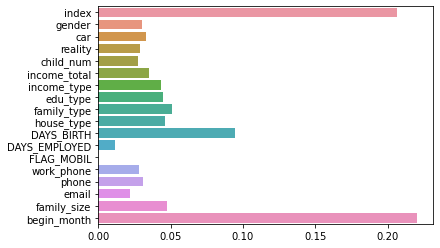

In [75]:
# 특성 중요도 시각화
import seaborn as sns
feature_names = list(train_x.columns)
sns.barplot(clf.feature_importances_, y=feature_names)

In [30]:
from sklearn.model_selection import KFold, StratifiedKFold

def run_kfold(clf):
    folds=StratifiedKFold(n_splits=5, shuffle=True, random_state=55)
    outcomes=[]
    sub=np.zeros((test_x.shape[0], 3))  
    for n_fold, (train_index, val_index) in enumerate(folds.split(train_x, train_y)):
        X_train, X_val = train_x.iloc[train_index], train_x.iloc[val_index]
        y_train, y_val = train_y.iloc[train_index], train_y.iloc[val_index]
        clf.fit(X_train, y_train)
        
        predictions=clf.predict_proba(X_val)
        
        logloss=log_loss(to_categorical(y_val['credit']), predictions)
        outcomes.append(logloss)
        print(f"FOLD {n_fold} : logloss:{logloss}")
        
        sub+=clf.predict_proba(test_x)
        
        
    mean_outcome=np.mean(outcomes)
    
    print("Mean:{}".format(mean_outcome))
    return sub/folds.n_splits

my_submission = run_kfold(clf)

FOLD 0 : logloss:0.8508510800735897
FOLD 1 : logloss:0.8488090912324694
FOLD 2 : logloss:0.8497394818279445
FOLD 3 : logloss:0.8475365305229623
FOLD 4 : logloss:0.8457256151627915
Mean:0.8485323597639514


In [31]:
my_submission

array([[0.11891577, 0.2198202 , 0.66126403],
       [0.10928894, 0.2201756 , 0.67053547],
       [0.10264254, 0.24999829, 0.64735917],
       ...,
       [0.10801712, 0.19689747, 0.69508541],
       [0.1207096 , 0.24737834, 0.63191206],
       [0.12543052, 0.33181494, 0.54275454]])

In [32]:
submission

,index,0,1,2
0,26457,0,0,0
1,26458,0,0,0
2,26459,0,0,0
3,26460,0,0,0
4,26461,0,0,0
...,...,...,...,...
9995,36452,0,0,0
9996,36453,0,0,0
9997,36454,0,0,0
9998,36455,0,0,0


In [33]:
submission.loc[:,1:]=my_submission

In [34]:
submission

,index,0,1,2
0,26457,0.118916,0.219820,0.661264
1,26458,0.109289,0.220176,0.670535
2,26459,0.102643,0.249998,0.647359
3,26460,0.131527,0.204577,0.663896
4,26461,0.143888,0.323971,0.532140
...,...,...,...,...
9995,36452,0.110772,0.267286,0.621942
9996,36453,0.094696,0.327186,0.578118
9997,36454,0.108017,0.196897,0.695085
9998,36455,0.120710,0.247378,0.631912


In [36]:
submission.to_csv('D:/지연/credit_project/data/baseline_submission_rf.csv', index=False)

### 2. AdaBoost

In [76]:
X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, 
                                                    stratify=train_y, test_size=0.25,
                                                    random_state = 10086)

'''print("Train set: ")
print(X_train.shape)
print(y_train.shape)
print("===========")
print("Validation set: ")
print(X_val.shape)
print(y_val.shape)'''

# 모델 학습
ada_clf= AdaBoostClassifier(random_state = 10, n_estimators = 10) 
ada_clf.fit(X_train, y_train)
y_pred=ada_clf.predict_proba(X_val)

# 평가
print("훈련 세트 정확도: {:.3f}".format(ada_clf.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(ada_clf.score(X_val, y_val)))

print(f"log_loss: {log_loss(to_categorical(y_val['credit']), y_pred)}")

훈련 세트 정확도: 0.641
테스트 세트 정확도: 0.641
log_loss: 1.0523664981586929


<AxesSubplot:>

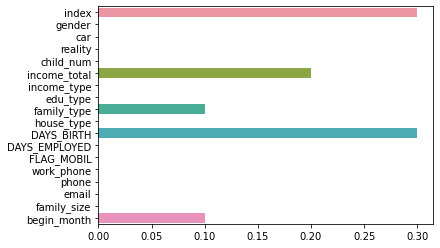

In [77]:
# 특성 중요도 시각화
import seaborn as sns
feature_names = list(train_x.columns)
sns.barplot(ada_clf.feature_importances_, y=feature_names)

In [78]:
from sklearn.model_selection import KFold, StratifiedKFold

def run_kfold(ada_clf):
    folds=StratifiedKFold(n_splits=5, shuffle=True, random_state=55)
    outcomes=[]
    sub=np.zeros((test_x.shape[0], 3))  
    for n_fold, (train_index, val_index) in enumerate(folds.split(train_x, train_y)):
        X_train, X_val = train_x.iloc[train_index], train_x.iloc[val_index]
        y_train, y_val = train_y.iloc[train_index], train_y.iloc[val_index]
        ada_clf.fit(X_train, y_train)
        
        predictions=ada_clf.predict_proba(X_val)
        
        logloss=log_loss(to_categorical(y_val['credit']), predictions)
        outcomes.append(logloss)
        print(f"FOLD {n_fold} : logloss:{logloss}")
        
        sub+=ada_clf.predict_proba(test_x)
        
        
    mean_outcome=np.mean(outcomes)
    
    print("Mean:{}".format(mean_outcome))
    return sub/folds.n_splits

my_submission = run_kfold(ada_clf)

FOLD 0 : logloss:1.0525183950848656
FOLD 1 : logloss:1.0521019669592764
FOLD 2 : logloss:1.052028698077584
FOLD 3 : logloss:1.05471162757762
FOLD 4 : logloss:1.0522401565514188
Mean:1.052720168850153


In [79]:
submission.loc[:,1:]=my_submission

In [ ]:
submission.to_csv('D:/지연/credit_project/data/baseline_submission_ada.csv', index=False)

### 3. GBM

In [80]:
X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, 
                                                    stratify=train_y, test_size=0.25,
                                                    random_state = 10086)

'''print("Train set: ")
print(X_train.shape)
print(y_train.shape)
print("===========")
print("Validation set: ")
print(X_val.shape)
print(y_val.shape)'''

# 모델 학습
gb_clf=GradientBoostingClassifier(max_depth = 6, n_estimators = 700 ,learning_rate = 0.01)
gb_clf.fit(X_train, y_train)
y_pred=gb_clf.predict_proba(X_val)

# 평가
print("훈련 세트 정확도: {:.3f}".format(gb_clf.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gb_clf.score(X_val, y_val)))

print(f"log_loss: {log_loss(to_categorical(y_val['credit']), y_pred)}")

훈련 세트 정확도: 0.676
테스트 세트 정확도: 0.640
log_loss: 0.8594515834778458


<AxesSubplot:>

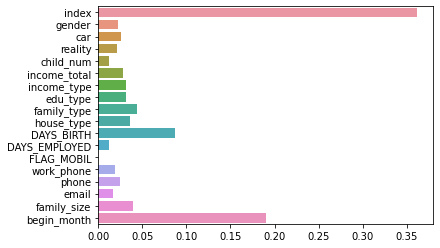

In [81]:
# 특성 중요도 시각화
import seaborn as sns
feature_names = list(train_x.columns)
sns.barplot(gb_clf.feature_importances_, y=feature_names)

In [82]:
from sklearn.model_selection import KFold, StratifiedKFold

def run_kfold(gb_clf):
    folds=StratifiedKFold(n_splits=5, shuffle=True, random_state=55)
    outcomes=[]
    sub=np.zeros((test_x.shape[0], 3))  
    for n_fold, (train_index, val_index) in enumerate(folds.split(train_x, train_y)):
        X_train, X_val = train_x.iloc[train_index], train_x.iloc[val_index]
        y_train, y_val = train_y.iloc[train_index], train_y.iloc[val_index]
        gb_clf.fit(X_train, y_train)
        
        predictions=gb_clf.predict_proba(X_val)
        
        logloss=log_loss(to_categorical(y_val['credit']), predictions)
        outcomes.append(logloss)
        print(f"FOLD {n_fold} : logloss:{logloss}")
        
        sub+=gb_clf.predict_proba(test_x)
        
        
    mean_outcome=np.mean(outcomes)
    
    print("Mean:{}".format(mean_outcome))
    return sub/folds.n_splits

my_submission = run_kfold(gb_clf)

FOLD 0 : logloss:0.8591750366251788
FOLD 1 : logloss:0.8597680603979402
FOLD 2 : logloss:0.8581145215201603
FOLD 3 : logloss:0.8610761353677229
FOLD 4 : logloss:0.8588016115777816
Mean:0.8593870730977567


In [83]:
submission.loc[:,1:]=my_submission

In [84]:
submission.to_csv('D:/지연/credit_project/data/baseline_submission_gb.csv', index=False)

### 4. XGBoost

In [86]:
X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, 
                                                    stratify=train_y, test_size=0.25,
                                                    random_state = 10086)

'''print("Train set: ")
print(X_train.shape)
print(y_train.shape)
print("===========")
print("Validation set: ")
print(X_val.shape)
print(y_val.shape)'''

# 모델 학습
xgb_clf=XGBClassifier(n_estimators = 100, learning_rate = 0.1)
xgb_clf.fit(X_train, y_train)
y_pred=xgb_clf.predict_proba(X_val)

# 평가
print("훈련 세트 정확도: {:.3f}".format(xgb_clf.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(xgb_clf.score(X_val, y_val)))

print(f"log_loss: {log_loss(to_categorical(y_val['credit']), y_pred)}")

[01:49:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
훈련 세트 정확도: 0.667
테스트 세트 정확도: 0.639
log_loss: 0.8599134544790557


<AxesSubplot:>

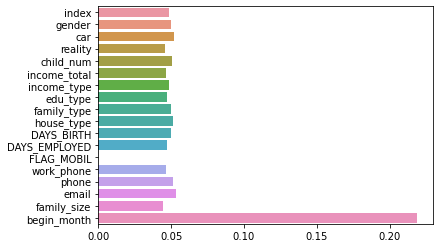

In [87]:
# 특성 중요도 시각화
import seaborn as sns
feature_names = list(train_x.columns)
sns.barplot(xgb_clf.feature_importances_, y=feature_names)

In [47]:
from sklearn.model_selection import KFold, StratifiedKFold

def run_kfold(xgb_clf):
    folds=StratifiedKFold(n_splits=5, shuffle=True, random_state=55)
    outcomes=[]
    sub=np.zeros((test_x.shape[0], 3))  
    for n_fold, (train_index, val_index) in enumerate(folds.split(train_x, train_y)):
        X_train, X_val = train_x.iloc[train_index], train_x.iloc[val_index]
        y_train, y_val = train_y.iloc[train_index], train_y.iloc[val_index]
        xgb_clf.fit(X_train, y_train)
        
        predictions=xgb_clf.predict_proba(X_val)
        
        logloss=log_loss(to_categorical(y_val['credit']), predictions)
        outcomes.append(logloss)
        print(f"FOLD {n_fold} : logloss:{logloss}")
        
        sub+=xgb_clf.predict_proba(test_x)
        
        
    mean_outcome=np.mean(outcomes)
    
    print("Mean:{}".format(mean_outcome))
    return sub/folds.n_splits

my_submission = run_kfold(xgb_clf)

[01:39:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
FOLD 0 : logloss:0.8577801340955816
[01:40:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
FOLD 1 : logloss:0.8574832625298543
[01:40:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behav

In [ ]:
submission.loc[:,1:]=my_submission

In [ ]:
submission.to_csv('D:/지연/credit_project/data/baseline_submission_xgb.csv', index=False)

### 5. CATboost

In [678]:
X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, 
                                                    stratify=train_y, test_size=0.25,
                                                    random_state = 10086)

'''print("Train set: ")
print(X_train.shape)
print(y_train.shape)
print("===========")
print("Validation set: ")
print(X_val.shape)
print(y_val.shape)'''

# 모델 학습
cat_clf=CatBoostClassifier()
cat_clf.fit(X_train, y_train)
y_pred=cat_clf.predict_proba(X_val)

# 평가
print("훈련 세트 정확도: {:.3f}".format(cat_clf.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(cat_clf.score(X_val, y_val)))

print(f"log_loss: {log_loss(to_categorical(y_val['credit']), y_pred)}")

CatBoostError: Bad value for num_feature[non_default_doc_idx=0,feature_idx=1]="F": Cannot convert 'b'F'' to float

<AxesSubplot:>

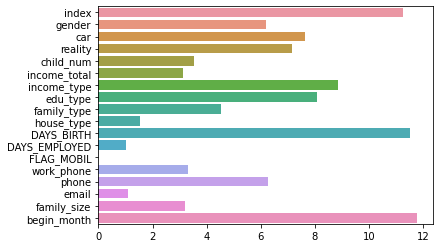

In [90]:
# 특성 중요도 시각화
import seaborn as sns
feature_names = list(train_x.columns)
sns.barplot(cat_clf.feature_importances_, y=feature_names)

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold

def run_kfold(cat_clf):
    folds=StratifiedKFold(n_splits=5, shuffle=True, random_state=55)
    outcomes=[]
    sub=np.zeros((test_x.shape[0], 3))  
    for n_fold, (train_index, val_index) in enumerate(folds.split(train_x, train_y)):
        X_train, X_val = train_x.iloc[train_index], train_x.iloc[val_index]
        y_train, y_val = train_y.iloc[train_index], train_y.iloc[val_index]
        cat_clf.fit(X_train, y_train)
        
        predictions=cat_clf.predict_proba(X_val)
        
        logloss=log_loss(to_categorical(y_val['credit']), predictions)
        outcomes.append(logloss)
        print(f"FOLD {n_fold} : logloss:{logloss}")
        
        sub+=cat_clf.predict_proba(test_x)
        
        
    mean_outcome=np.mean(outcomes)
    
    print("Mean:{}".format(mean_outcome))
    return sub/folds.n_splits

my_submission = run_kfold(cat_clf)

In [ ]:
submission.loc[:,1:]=my_submission

In [ ]:
submission.to_csv('D:/지연/credit_project/data/baseline_submission_cat.csv', index=False)